# Grover: factorize number

In [1]:
from typing import Tuple
from qlasskit import qlassf, Qint
from qlasskit.algorithms import Grover


@qlassf
def factorize(a: Tuple[Qint[2], Qint[2]]) -> bool:
    return a[0] * a[1] == 9


q_algo = Grover(factorize)

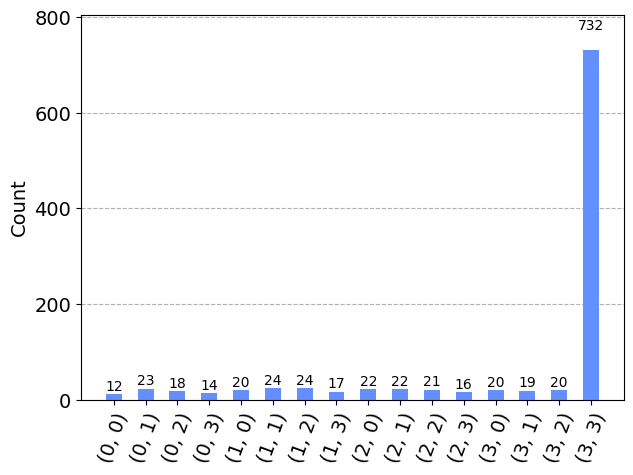

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

qc = q_algo.export("qiskit")
qc.measure_all()
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

counts_readable = q_algo.decode_counts(counts, discard_lower=5)
plot_histogram(counts_readable)

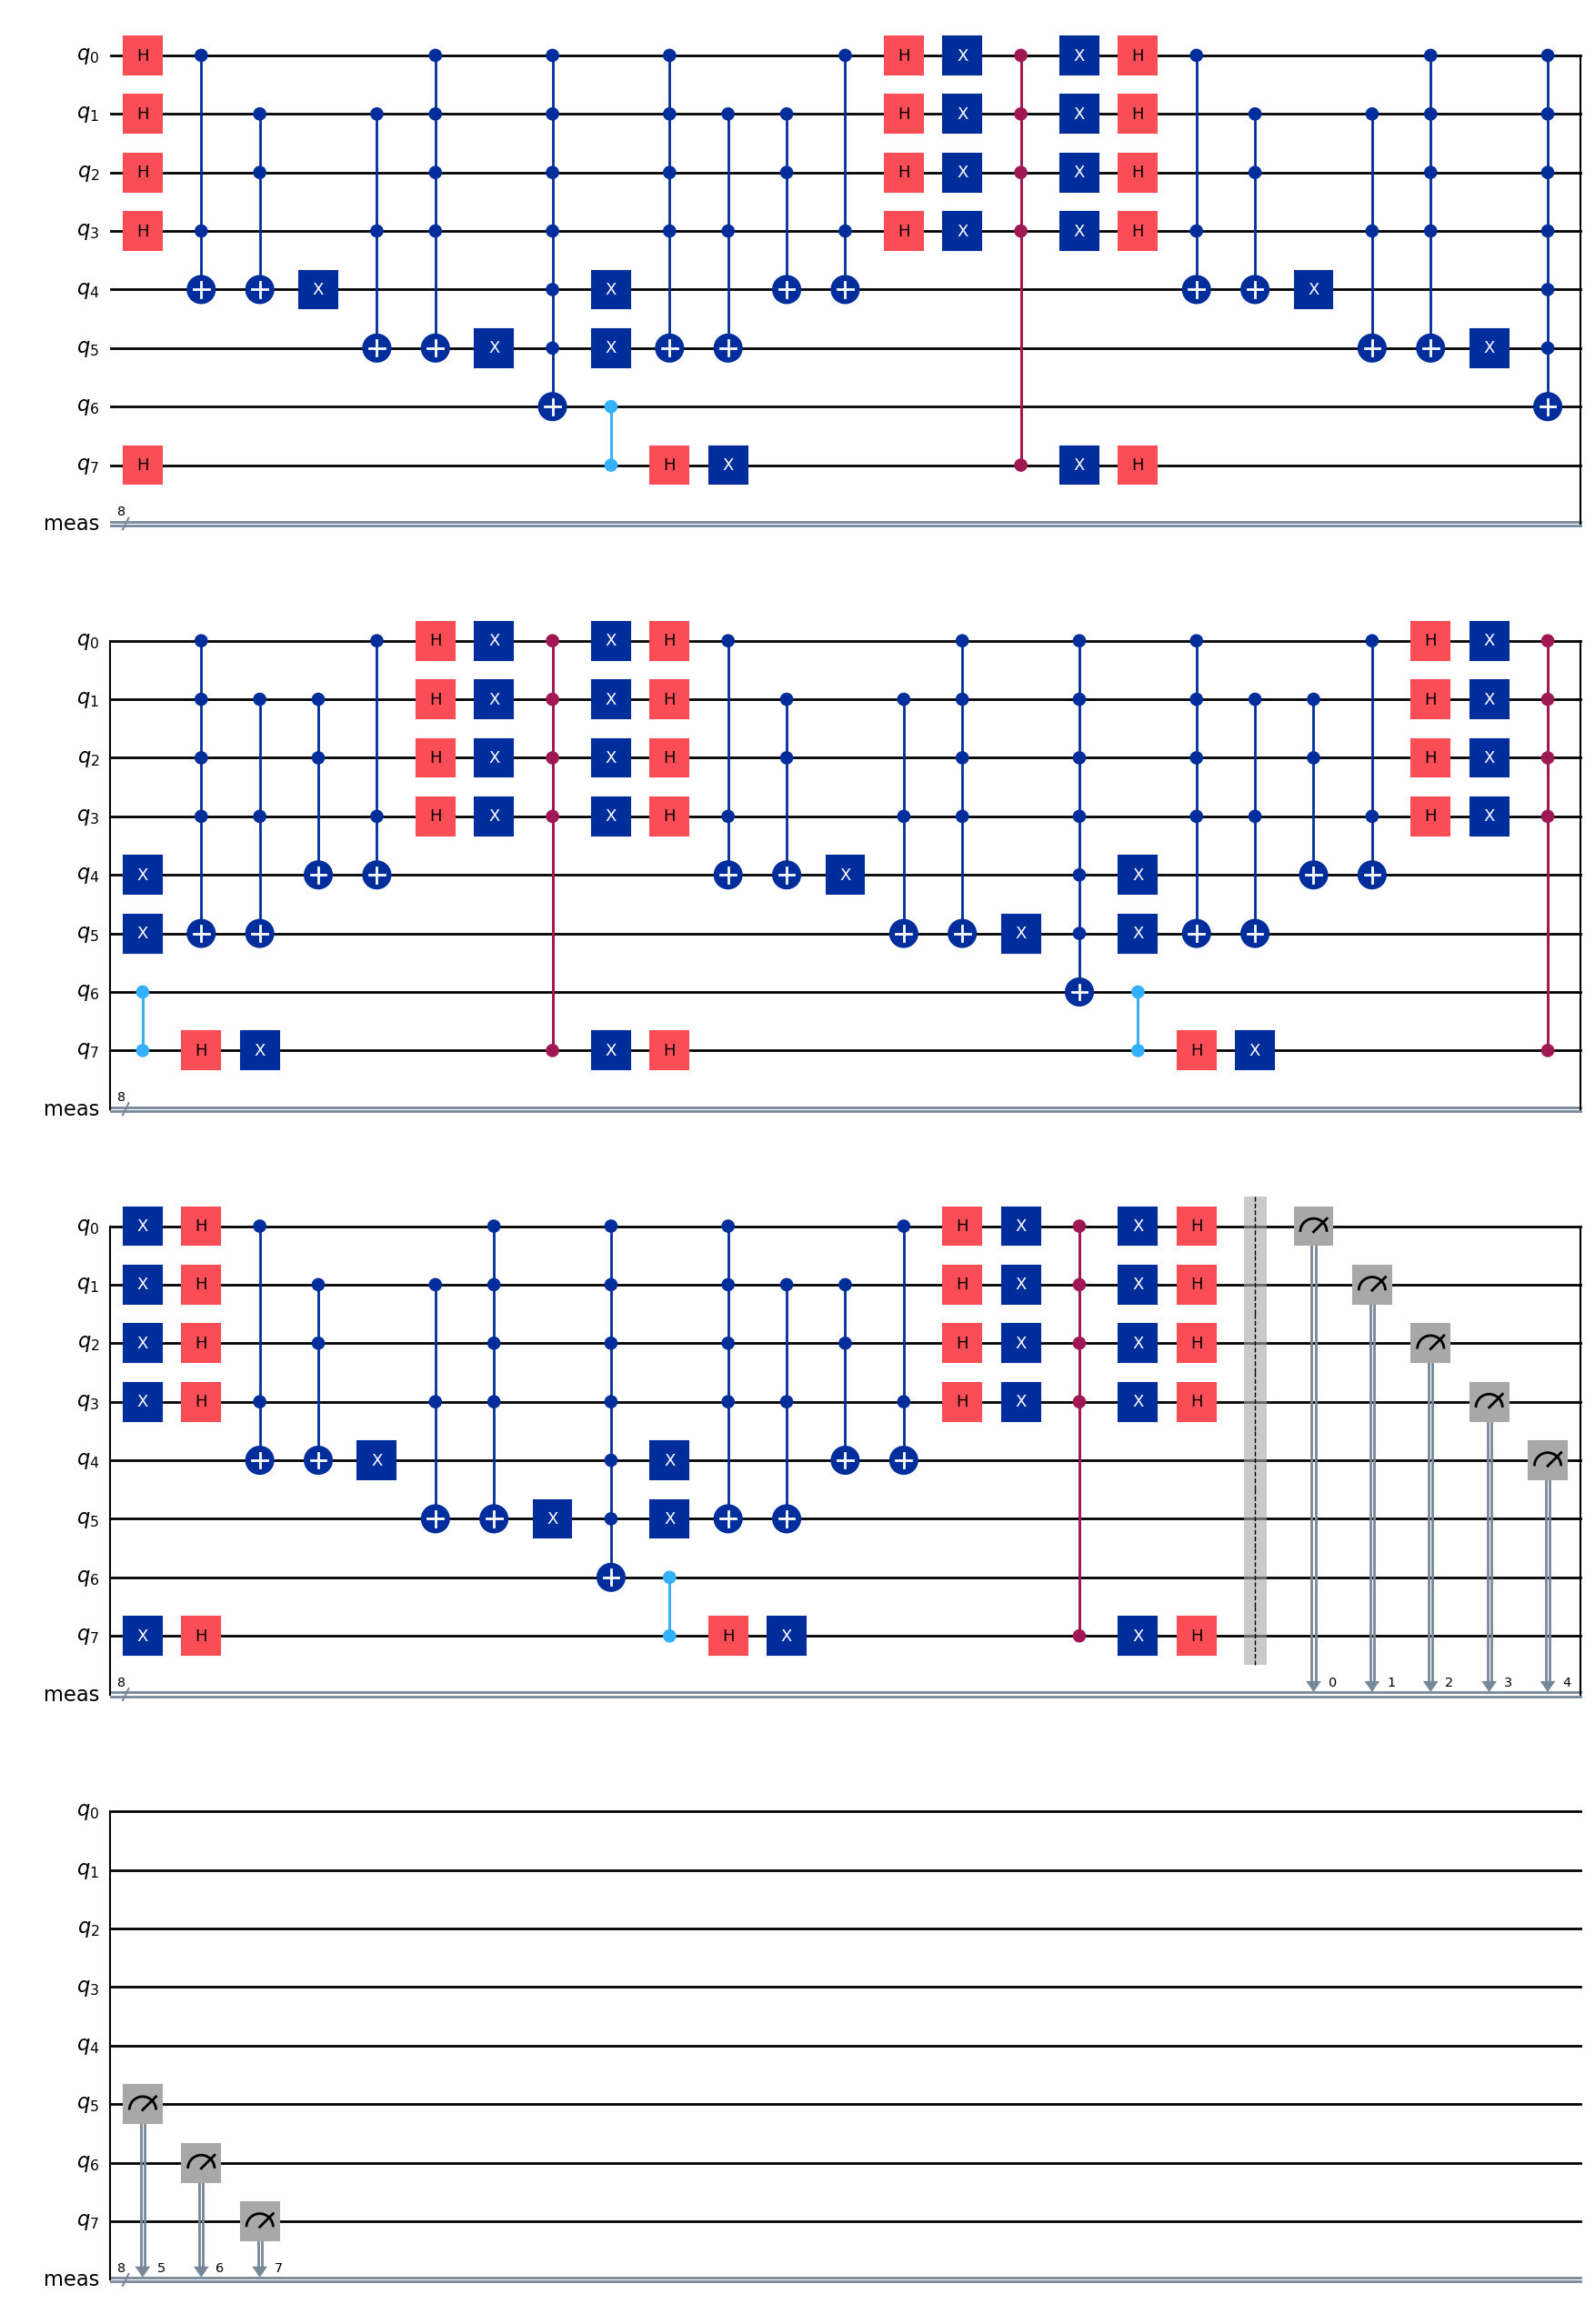

In [3]:
qc.draw("mpl")